# Step-1: Loading the data and the necessary libraries & function classes

## A. Loading the basic libraries

In [3]:
import pandas as pd
import numpy as np

## B. Loading the Data

In [5]:
df = pd.read_csv('sws.csv')

## C. Display the first few rows to understand its structure

In [7]:
df.head()

,States,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,...,interest_received,net_income,net_fixed_capital_formation,gross_fixed_capital_formation,addn_raw_mat_fuel,addn_semi_finished,addn_finished,addn_total,gross_capital_formation,net_profit
0,Andaman & N. Island,14,1.529000e+08,8.800000e+06,3.137000e+08,1.560000e+08,146,192,3.020000e+07,5.020000e+07,...,100000,2.930000e+07,-1.060000e+07,6.000000e+06,-2.230000e+07,0,3.800000e+06,-1.850000e+07,-1.250000e+07,-2.580000e+07
1,Andhra Pradesh,16483,2.250000e+12,5.720000e+11,3.190000e+12,8.330000e+11,571376,695020,1.340000e+11,2.330000e+11,...,13273700000,6.460000e+11,1.040000e+11,2.700000e+11,-3.866510e+10,13782300000,5.022360e+10,2.534080e+10,2.950000e+11,3.810000e+11
2,Arunachal Pradesh,198,5.034000e+09,2.728600e+09,7.361500e+09,1.049900e+09,3200,4341,3.324000e+08,9.011000e+08,...,37700000,2.270500e+09,3.856000e+08,9.371000e+08,3.832000e+08,-19900000,1.006000e+08,4.638000e+08,1.401000e+09,1.334000e+09
3,Assam,5712,4.350000e+11,1.390000e+11,6.030000e+11,1.140000e+11,204416,258320,2.438180e+10,4.801030e+10,...,1693700000,2.440000e+11,6.226230e+10,9.256960e+10,6.901000e+08,-967700000,1.886520e+10,1.858760e+10,1.110000e+11,1.900000e+11
4,Bihar,3307,3.200000e+11,6.283050e+10,4.310000e+11,8.586540e+10,114949,135464,1.580930e+10,2.640200e+10,...,985900000,1.370000e+11,1.080000e+11,1.240000e+11,1.017200e+09,393200000,7.487700e+09,8.898100e+09,1.330000e+11,1.080000e+11


# Step-2: Preprocess the Data

## A. Check for missing values

In [10]:
df.isnull().sum()

States                           0
no_of_factories                  0
fixed_capital                    0
working_capital                  0
invested_capital                 0
outstanding_loans                0
no_of_workers                    0
total_persons_engaged            0
wages_workers                    0
total_emoluments                 0
pf_esi_others                    0
fuel_consumed                    0
material_consumed                0
total_input                      0
products_by_products             0
total_output                     0
depreciation                     0
nva                              0
rent_paid                        0
interest_paid                    0
rent_received                    0
interest_received                0
net_income                       0
net_fixed_capital_formation      0
gross_fixed_capital_formation    0
addn_raw_mat_fuel                0
addn_semi_finished               0
addn_finished                    0
addn_total          

## B. Identify categorical columns

In [12]:
categorical_cols = df.select_dtypes(include = ['object']).columns
categorical_cols

Index(['States'], dtype='object')

# Step-3: OneHot Encoding

## A. Importing the library

In [15]:
from sklearn.preprocessing import OneHotEncoder

## B. Initialize OneHotEncoder

In [17]:
encoder = OneHotEncoder(drop = 'first', sparse_output = False)
encoded_cols = encoder.fit_transform(df[categorical_cols])

## C. Create DataFrame with encoded columns

In [19]:
encoded_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(categorical_cols))

## D. Concatenate encoded columns back to original DataFrame (dropping original categorical columns)

In [21]:
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

## E. View the Encoded Dataset

In [23]:
df.head()

,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,pf_esi_others,...,States_Puducherry,States_Punjab,States_Rajasthan,States_Sikkim,States_Tamil Nadu,States_Telangana,States_Tripura,States_Uttar Pradesh,States_Uttarakhand,States_West Bengal
0,14,1.529000e+08,8.800000e+06,3.137000e+08,1.560000e+08,146,192,3.020000e+07,5.020000e+07,4.900000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16483,2.250000e+12,5.720000e+11,3.190000e+12,8.330000e+11,571376,695020,1.340000e+11,2.330000e+11,3.185920e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,198,5.034000e+09,2.728600e+09,7.361500e+09,1.049900e+09,3200,4341,3.324000e+08,9.011000e+08,3.540000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5712,4.350000e+11,1.390000e+11,6.030000e+11,1.140000e+11,204416,258320,2.438180e+10,4.801030e+10,5.959700e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3307,3.200000e+11,6.283050e+10,4.310000e+11,8.586540e+10,114949,135464,1.580930e+10,2.640200e+10,2.461600e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step-4: Perform PCA for Dimensionality Reduction

## A. Importing the libraries

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## B. Standardize the data

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## C. Apply PCA

In [30]:
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

## D. Calculate the cumulative explained variance to choose number of components

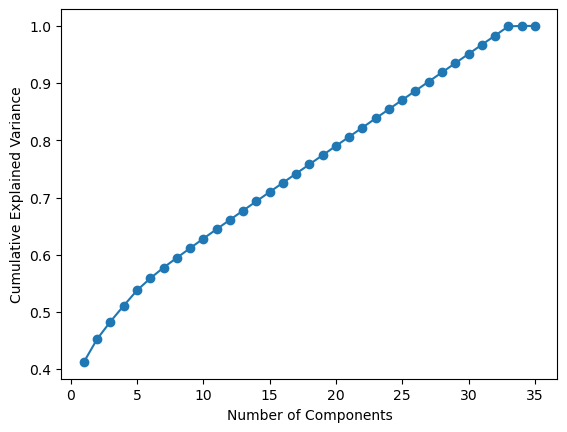

In [32]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## E. Selecting the number of components (e.g., explaining ~90% variance)

In [34]:
n_components = next(i for i, v in enumerate(explained_variance) if v > 0.9)
pca = PCA(n_components = n_components)
df_pca = pca.fit_transform(df_scaled)

# Step-5: Determine Optimal Clusters Using K-Means

## A. Importing the libraries

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## B. Elbow method and Silhouette score analysis

In [39]:
sse = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

## C. Plot SSE and Silhouette Score

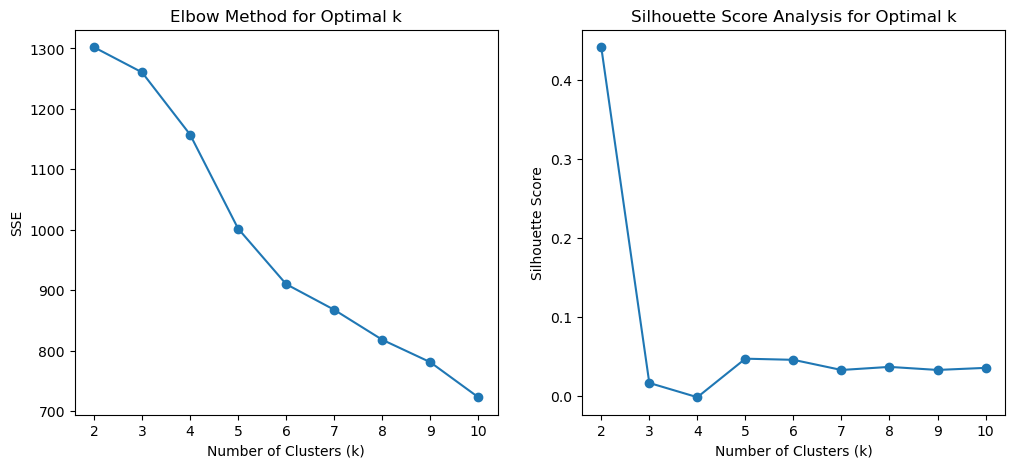

In [41]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k (State)')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for Optimal k (State)')

plt.show()

# Step-6: Perform K-Means Clustering

## A. Finding the the optimal k and adding the cluster labels to the original data

In [44]:
optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df['Cluster'] = kmeans.fit_predict(df_pca)

C:\Users\Nilotpal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## B. Display the first few rows with cluster labels

In [46]:
df.head()

,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,total_persons_engaged,wages_workers,total_emoluments,pf_esi_others,...,States_Punjab,States_Rajasthan,States_Sikkim,States_Tamil Nadu,States_Telangana,States_Tripura,States_Uttar Pradesh,States_Uttarakhand,States_West Bengal,Cluster
0,14,1.529000e+08,8.800000e+06,3.137000e+08,1.560000e+08,146,192,3.020000e+07,5.020000e+07,4.900000e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,16483,2.250000e+12,5.720000e+11,3.190000e+12,8.330000e+11,571376,695020,1.340000e+11,2.330000e+11,3.185920e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,198,5.034000e+09,2.728600e+09,7.361500e+09,1.049900e+09,3200,4341,3.324000e+08,9.011000e+08,3.540000e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5712,4.350000e+11,1.390000e+11,6.030000e+11,1.140000e+11,204416,258320,2.438180e+10,4.801030e+10,5.959700e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3307,3.200000e+11,6.283050e+10,4.310000e+11,8.586540e+10,114949,135464,1.580930e+10,2.640200e+10,2.461600e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Step-7: Visualizing the clusters on the PCA-reduced data

## A. Importing the library

In [49]:
import seaborn as sns

## B. Plotting the Clusters

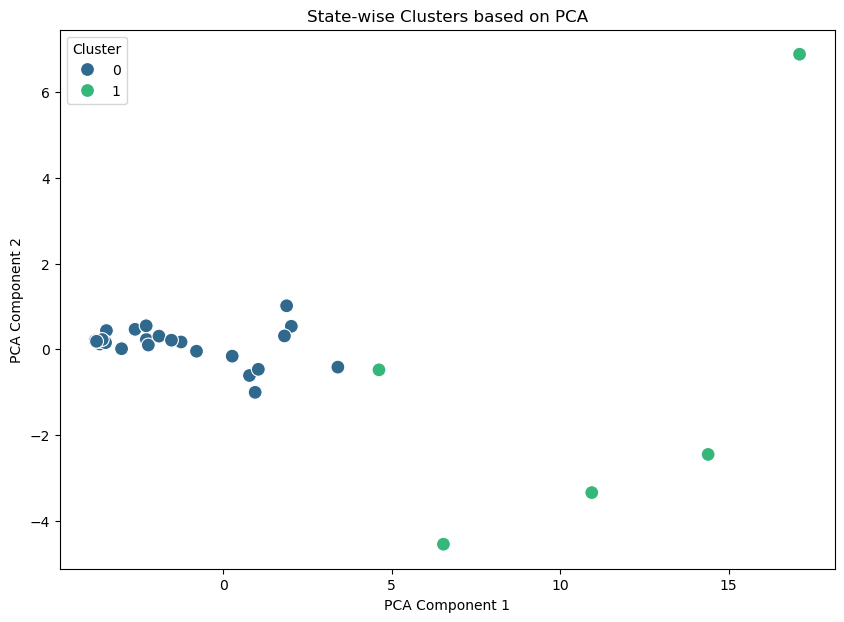

In [51]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = df_pca[:, 0], y = df_pca[:, 1], hue = df['Cluster'], palette = 'viridis', s = 100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('State-wise Clusters based on PCA')
plt.legend(title = 'Cluster')
plt.show()

## C. View the names of the higher performing states i.e. States belonging to Cluster 1

In [53]:
X = pd.read_csv('sws.csv')
df.insert(0, 'States', X['States'])
sc1 = df[df['Cluster'] == 1]['States']
print(sc1)

10          Gujarat
15        Karnataka
19      Maharashtra
29       Tamil Nadu
32    Uttar Pradesh
Name: States, dtype: object


## D. Save the clustered data

In [55]:
df.to_csv('segmented_states.csv', index = False)